In [1]:
import pandas as pd
import gensim
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
# Import data
X = pd.read_csv('DATA/clean_data/hard_cleaning_input_train.csv', sep=";", index_col=0)
y = pd.read_csv('DATA/output_train.csv', sep=";", index_col=0)

features = X.columns
targets = y['intention'].unique()

In [3]:
more_sentences = [sentence.split() for sentence in X['question'].values]

# Update already trained word2vec in french

In [ ]:
model = gensim.models.Word2Vec.load('DATA/trained_vectors/word2vec/fr.bin')
model.build_vocab(sentences=more_sentences, update=True, progress_per=1)
debut = time.time()
model.train(more_sentences, total_examples=len(more_sentences), epochs=1000)
fin = time.time()
print('durée : ', fin-debut) # 100 s for 1000 epoch
model = model.wv.save_word2vec_format(fname = 'DATA/trained_vectors/custom_word2vec/custom_fr.bin', 
                                      fvocab='DATA/trained_vectors/custom_word2vec/custom_fr_vocab.txt', 
                                      binary=True)
#model.wv.save_word2vec_format('DATA/trained_vectors/custom_word2vec/custom_fr.bin', binary=True)

## Test custom word2vec in french built from scratch

In [6]:
scratch_model =gensim.models.KeyedVectors.load_word2vec_format(fname = 'DATA/trained_vectors/custom_word2vec/scratch_fr_night.bin', 
                                                               fvocab='DATA/trained_vectors/custom_word2vec/scratch_fr_vocab_night.txt', 
                                                               binary=True)

# Plot TSNE 
taken from https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

In [9]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


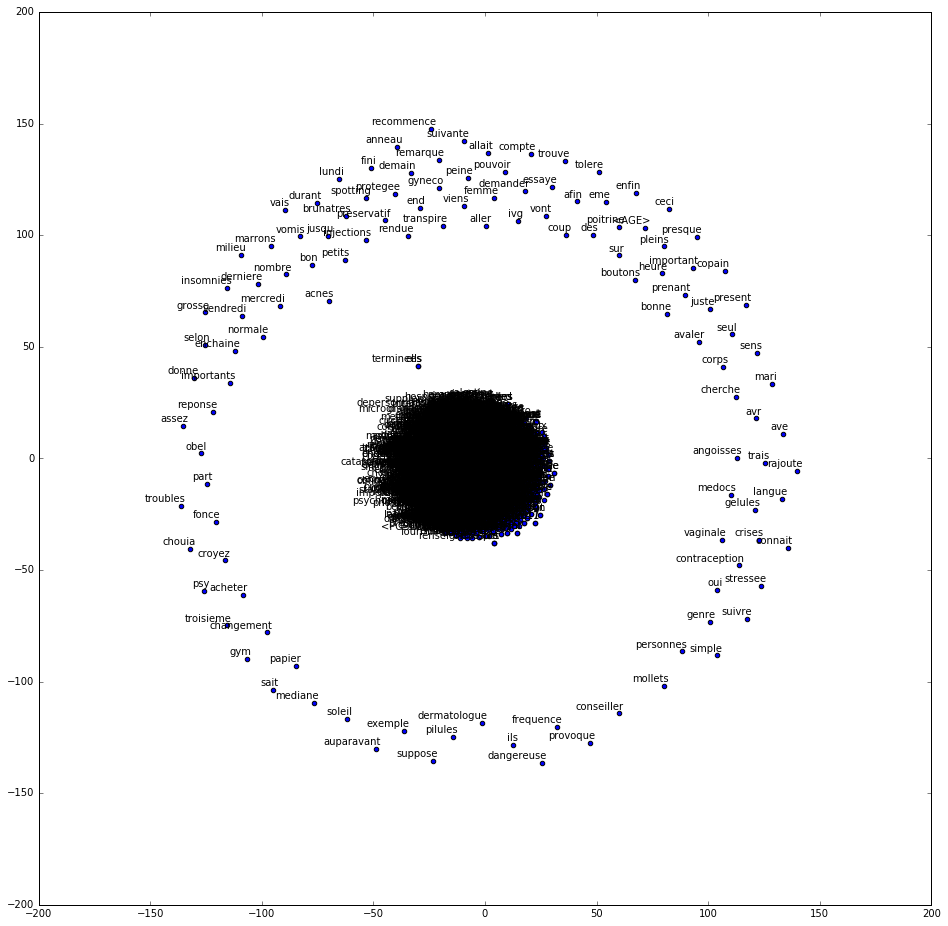

In [10]:
tsne_plot(scratch_model)

In [15]:
scratch_model.most_similar(["vendredi"], topn=50)

[('<HEURE>', 0.22830331325531006),
 ('lundi', 0.22249098122119904),
 ('jme', 0.22070643305778503),
 ('dimanche', 0.21787823736667633),
 ('mercredi', 0.19666683673858643),
 ('minis', 0.19611985981464386),
 ('cor', 0.195127934217453),
 ('mardi', 0.1939239799976349),
 ('jeudi', 0.1920587569475174),
 ('norlevo', 0.18500494956970215),
 ('reprends', 0.18348824977874756),
 ('prevue', 0.18069079518318176),
 ('crac', 0.1756981909275055),
 ('rapport', 0.17070981860160828),
 ('toubib', 0.16542723774909973),
 ('atroce', 0.16514386236667633),
 ('levant', 0.16390648484230042),
 ('suppositoire', 0.16287016868591309),
 ('prolonge', 0.16135208308696747),
 ('judicieux', 0.16078758239746094),
 ('oublie', 0.1607767939567566),
 ('annule', 0.1590760052204132),
 ('800', 0.15875080227851868),
 ('precaution', 0.1580522656440735),
 ('medorrhinum', 0.1569313108921051),
 ('marre', 0.15661905705928802),
 ('remarquer', 0.15655407309532166),
 ('suce', 0.15565051138401031),
 ('comprimer', 0.15482574701309204),
 ('hie